## Importando bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

## Importando a base

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MODELAGEM E PREPARAÇÃO DE DADOS/EXERCÍCIO 04/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Correlação


In [ ]:
data = data.drop('Time',axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 30)

In [ ]:
corr = data.drop('Class',axis=1).corr('spearman',min_periods=4).round(2)
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.00,-0.38,-0.41,0.10,-0.11,-0.09,-0.23,-0.24,0.14,0.23,...,-0.21,-0.06,-0.03,0.15,-0.00,0.05,0.01,-0.10,-0.21,-0.09
V2,-0.38,1.00,0.07,0.16,0.34,-0.11,0.43,0.01,-0.08,-0.21,...,0.04,-0.10,-0.06,-0.09,0.01,-0.09,0.03,0.13,0.14,-0.50
V3,-0.41,0.07,1.00,0.06,-0.22,0.17,-0.07,0.16,-0.03,-0.07,...,0.11,-0.04,0.00,-0.14,-0.00,0.03,-0.02,0.14,0.18,-0.00
V4,0.10,0.16,0.06,1.00,0.02,0.08,0.06,-0.01,0.11,0.03,...,-0.01,0.04,-0.00,0.01,-0.01,0.06,-0.06,-0.03,0.00,-0.02
V5,-0.11,0.34,-0.22,0.02,1.00,-0.01,0.43,-0.06,-0.06,-0.15,...,0.06,-0.04,-0.01,-0.11,-0.02,-0.02,0.03,0.01,-0.03,-0.31
V6,-0.09,-0.11,0.17,0.08,-0.01,1.00,-0.29,0.44,0.03,0.06,...,0.05,0.03,0.04,-0.05,-0.14,-0.01,-0.02,0.07,0.02,0.21
V7,-0.23,0.43,-0.07,0.06,0.43,-0.29,1.00,-0.39,-0.10,-0.21,...,0.16,-0.02,-0.02,-0.19,-0.01,-0.05,0.02,-0.09,0.06,-0.03
V8,-0.24,0.01,0.16,-0.01,-0.06,0.44,-0.39,1.00,-0.00,-0.12,...,0.01,0.08,0.02,0.08,-0.02,-0.07,-0.01,0.19,0.09,0.00
V9,0.14,-0.08,-0.03,0.11,-0.06,0.03,-0.10,-0.00,1.00,-0.29,...,-0.02,-0.07,0.00,0.07,-0.00,-0.02,0.03,-0.00,-0.10,-0.08
V10,0.23,-0.21,-0.07,0.03,-0.15,0.06,-0.21,-0.12,-0.29,1.00,...,-0.09,-0.05,0.04,0.08,-0.01,-0.02,-0.03,-0.02,-0.13,0.05


<AxesSubplot:>

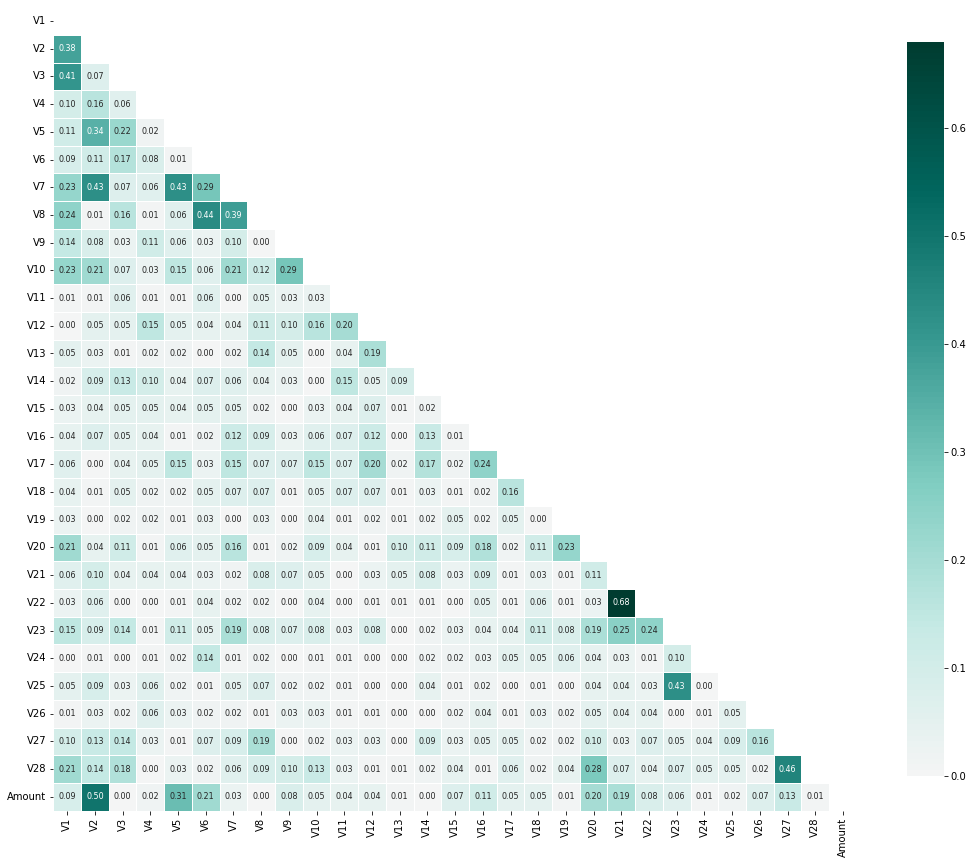

In [ ]:
plt.subplots(figsize=(18, 18))
sns.heatmap(abs(corr),
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            cmap='BrBG', center=0, cbar_kws={"shrink": .75},
            annot=abs(corr), annot_kws={"fontsize":8}, fmt='.2f',
            square=True, linewidths=.5)


<AxesSubplot:>

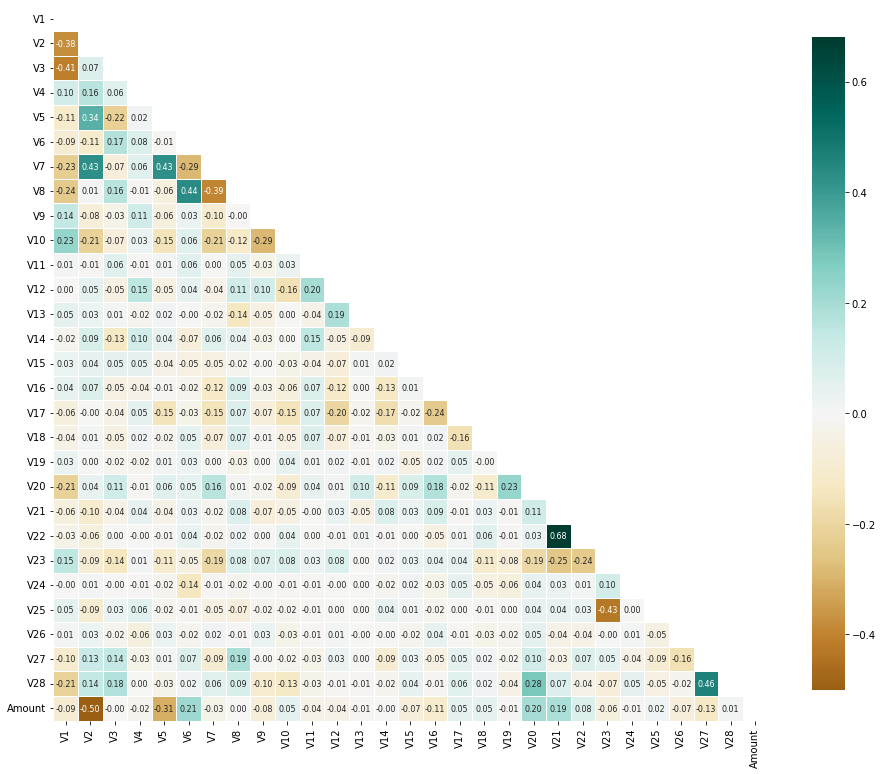

In [ ]:
plt.subplots(figsize=(16, 16))
sns.heatmap(corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            cmap='BrBG', center=0, cbar_kws={"shrink": .75},
            annot=corr, annot_kws={"fontsize":8}, fmt='.2f',
            square=True, linewidths=.5)


## Variação

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(1.0)
data_variance = pd.DataFrame(sel.fit_transform(data))
data_variance

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,10.00


## ANOVA

In [ ]:
sk.feature_selection.f_classif(X = data.drop('Class', axis=1), y = data['Class'])

(array([2.95566895e+03, 2.39340168e+03, 1.10145083e+04, 5.16383211e+03,
        2.59235793e+03, 5.43510578e+02, 1.03496054e+04, 1.12548287e+02,
        2.74660027e+03, 1.40579800e+04, 6.99935505e+03, 2.07498224e+04,
        5.94767235e+00, 2.86955478e+04, 5.08019349e+00, 1.14433494e+04,
        3.39791686e+04, 3.58438061e+03, 3.44990997e+02, 1.14999731e+02,
        4.65916251e+02, 1.84706496e-01, 2.05347633e+00, 1.48509325e+01,
        3.11606176e+00, 5.65365293e+00, 8.80452963e+01, 2.59014046e+01,
        9.03334471e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.21311135e-120, 0.00000000e+000, 2.74067310e-026,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.47373390e-002, 0.00000000e+000, 2.42014260e-002, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.80151730e-077, 7.96429203e-027,
        3.00226856e-103, 6.67359691e-001, 1.51860199e-001, 1.16376028e-004,
        7.7525

## Usando a importância intrínseca do algoritmo Random Forest, selecione as 10 variáveis mais importantes

In [ ]:

rfc = RandomForestClassifier(n_jobs=-1)

rfc.fit(X = data,
        y = data['Class'])

RandomForestClassifier(n_jobs=-1)

In [ ]:
rfc.feature_importances_

array([0.00330466, 0.00379966, 0.00810245, 0.01498877, 0.00327084,
       0.00891478, 0.01224033, 0.00466339, 0.02318243, 0.0497348 ,
       0.03496628, 0.09882016, 0.00168591, 0.05307514, 0.00194054,
       0.03407584, 0.1328835 , 0.0149114 , 0.00224286, 0.00315635,
       0.00523853, 0.00226512, 0.00146027, 0.00280439, 0.00195398,
       0.0081452 , 0.00449624, 0.00304342, 0.00231792, 0.45831486])

In [ ]:
imp = pd.DataFrame(data.columns, columns=['variavel'])
imp['importancia'] = rfc.feature_importances_
imp

,variavel,importancia
0,V1,0.003305
1,V2,0.003800
2,V3,0.008102
3,V4,0.014989
4,V5,0.003271
5,V6,0.008915
6,V7,0.012240
7,V8,0.004663
8,V9,0.023182
9,V10,0.049735


In [ ]:
imp.sort_values('importancia',ascending=False)[:10]

,variavel,importancia
29,Class,0.458315
16,V17,0.132884
11,V12,0.098820
13,V14,0.053075
9,V10,0.049735
10,V11,0.034966
15,V16,0.034076
8,V9,0.023182
3,V4,0.014989
17,V18,0.014911


## Selecione as 10 principais variáveis do problema a partir do método Mutual Information

In [ ]:
mif = mutual_info_classif(X = data.drop('Class', axis=1),
                          y = data['Class'],
                          random_state = 14)

<AxesSubplot:>

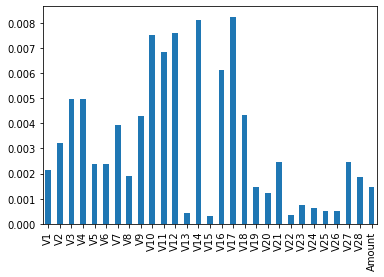

In [ ]:
importance_mif = pd.Series(mif, index=data.drop(columns='Class').columns)
importance_mif.plot.bar()

In [ ]:
importance_mif

V1        0.002127
V2        0.003228
V3        0.004952
V4        0.004976
V5        0.002389
V6        0.002388
V7        0.003951
V8        0.001898
V9        0.004277
V10       0.007530
V11       0.006831
V12       0.007601
V13       0.000408
V14       0.008136
V15       0.000315
V16       0.006144
V17       0.008258
V18       0.004317
V19       0.001472
V20       0.001207
V21       0.002452
V22       0.000353
V23       0.000762
V24       0.000642
V25       0.000500
V26       0.000500
V27       0.002444
V28       0.001871
Amount    0.001453
dtype: float64

In [ ]:
importance_mif.sort_values(ascending=False)[:10]

V17    0.008258
V14    0.008136
V12    0.007601
V10    0.007530
V11    0.006831
V16    0.006144
V4     0.004976
V3     0.004952
V18    0.004317
V9     0.004277
dtype: float64

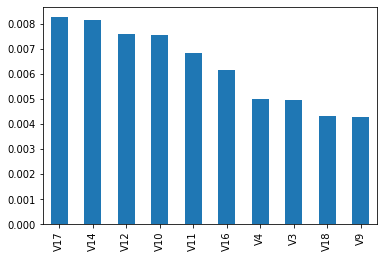

In [ ]:
importance_mif.sort_values(ascending=False)[:10].plot.bar();